### 1. Business Understanding

#### 1.1 Business Context
The COVID-19 pandemic remains one of the most significant public health challenges in Ghana’s modern history. Since the first confirmed case in March 2020, the Ghana Health Service (GHS), Ministry of Information, and Ghana Statistical Service (GSS) have provided regular updates on confirmed cases, recoveries, and deaths across all regions.

These updates provided a valuable data foundation for understanding the spread, peak periods, and recovery dynamics of the disease. However, raw figures alone cannot reveal deeper insights into:

- Temporal and regional trends in infections and recoveries,
- Effectiveness of interventions such as lockdowns, vaccination drives, and testing campaigns, and
- Data-driven lessons for future epidemic preparedness.
Data analytics provides a powerful approach for transforming these daily records into actionable knowledge that can guide public health decision-making, optimize resource allocation, and improve national crisis response systems.

#### 1.2 Business Problem
Although Ghana collected rich COVID-19 data, decision-makers lacked detailed analytical dashboards and trend models to help:
- Identify periods of rapid spread or containment,
- Detect patterns in recoveries and deaths,
- Evaluate the timing and impact of government interventions, and
- Provide evidence-based recommendations for future response strategies.


Hence, the core business problem is:

How can use data analysis to uncover meaningful insights from Ghana’s COVID-19 records to evaluate patterns, inform policy, and strengthen health system preparedness?


#### 1.3 Business Objectives
Main Objective:
- To analyze and visualize Ghana’s COVID-19 dataset to uncover temporal trends, relationships, and policy-relevant insights.

Specific Objectives:
- Identify temporal patterns (growth, decline, and peaks) in active, recovered, and death cases.
- Examine relationships among key indicators such as total cases, recoveries, and deaths.
- Assess how government interventions may have influenced trends.
- Build an interactive dashboard for policymakers to explore insights easily.

#### 1.4 Business Questions
1. How did active and cumulative COVID-19 cases evolve over time in Ghana?
2. When did Ghana experience the major peaks of the pandemic, and what interventions were implemented?
3. How do recovery and death trends compare across the different phases of the pandemic?
4. What correlations exist between total cases, recoveries, and deaths?
5. What actionable lessons can be drawn to inform future public health response strategies?




















### 2. Data Understanding

#### 2.1 Load and Inspect Data

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
covid_data = pd.read_csv('../Data/Ghana_Covid19_DailyActive.csv')

covid_data.head(10)

,confirmed,recovered,death,date,cumulative_confirmed,cumulative_recovered,cumulative_death,active_cases
0,2,0,0,03/12/2020,2,0,0,2
1,2,0,0,03/13/2020,4,0,0,4
2,2,0,0,03/14/2020,6,0,0,6
3,1,0,0,03/17/2020,7,0,0,7
4,2,0,0,03/18/2020,9,0,0,9
5,2,0,0,03/19/2020,11,0,0,11
6,5,0,0,03/20/2020,16,0,0,16
7,3,2,1,03/21/2020,19,2,1,16
8,3,0,1,03/22/2020,22,2,2,18
9,3,0,0,03/23/2020,25,2,2,21


In [19]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   confirmed              233 non-null    int64 
 1   recovered              233 non-null    int64 
 2   death                  233 non-null    int64 
 3   date                   233 non-null    object
 4   cumulative_confirmed   233 non-null    int64 
 5   cumulative_recovered   233 non-null    int64 
 6   cumulative_death       233 non-null    int64 
 7   active_cases           233 non-null    int64 
dtypes: int64(7), object(1)
memory usage: 14.7+ KB


In [20]:
# Strip whitespace from column names and change date column to datetime type
# This avoids KeyError caused by stray spaces in column headers (e.g. 'cumulative_confirmed ')
covid_data.columns = covid_data.columns.str.strip()
covid_data['date'] = pd.to_datetime(covid_data['date'], errors='coerce')
# If any dates failed to parse, inspect with: covid_data[covid_data['date'].isna()]

In [21]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   confirmed             233 non-null    int64         
 1   recovered             233 non-null    int64         
 2   death                 233 non-null    int64         
 3   date                  233 non-null    datetime64[ns]
 4   cumulative_confirmed  233 non-null    int64         
 5   cumulative_recovered  233 non-null    int64         
 6   cumulative_death      233 non-null    int64         
 7   active_cases          233 non-null    int64         
dtypes: datetime64[ns](1), int64(7)
memory usage: 14.7 KB


In [22]:
#check for missing values
covid_data.isnull().sum()

confirmed               0
recovered               0
death                   0
date                    0
cumulative_confirmed    0
cumulative_recovered    0
cumulative_death        0
active_cases            0
dtype: int64

In [23]:
#check for duplicate rows
covid_data.duplicated()

print("Number of duplicate rows: ", covid_data.duplicated().sum())

Number of duplicate rows:  0


In [24]:
# Check the total number of rows
total_rows = covid_data.shape[0]

# Count missing values per row
missing_counts_per_row = covid_data.isna().sum(axis=1)

# Count non-null values per row
non_null_counts_per_row = covid_data.notna().sum(axis=1)

# Compute missing percentage per row
missing_percentage_per_row = round((missing_counts_per_row / covid_data.shape[1]) * 100, 2)

# Create DataFrame summarizing row-wise information
covid_data_row_info = pd.DataFrame({
    "Non-Null Count": non_null_counts_per_row,
    "Missing Count": missing_counts_per_row,
    "Missing Percentage": missing_percentage_per_row
})

# Display the first few rows
covid_data_row_info.head()

,Non-Null Count,Missing Count,Missing Percentage
0,8,0,0.0
1,8,0,0.0
2,8,0,0.0
3,8,0,0.0
4,8,0,0.0


In [25]:
#Write cleaned data to new CSV file
covid_data.to_csv('../Data/Ghana_Covid19_DailyActive_Cleaned.csv', index=False)

##### Comment
- Loaded the COVID-19 dataset and perform initial inspection to understand its structure, content, and quality.

After initial inspection
- They were no missing values in the dataset.
- The dataset contains daily records of COVID-19 cases in Ghana, including total cases, active cases, recoveries, deaths, and testing numbers.
- The date column is in a standard format and can be easily converted to datetime type for time series analysis.
- The dataset spans from the first reported case in March 2020 to November 2020, providing a comprehensive view of the pandemic's progression in Ghana.


### 2.2  Exploratory Data Analysis (EDA)
#### 2.2.1 Univariate Analysis
Purpose: To understand the distribution and characteristics of individual variables in the COVID-19 dataset.

In [26]:
#check for descriptive statistics
covid_data.describe().round(2).T

,count,mean,min,25%,50%,75%,max,std
confirmed,233.0,221.75,1.0,59.0,131.0,295.0,1513.0,241.39
recovered,233.0,216.94,0.0,32.0,97.0,221.0,5526.0,441.66
death,233.0,1.39,0.0,0.0,0.0,2.0,15.0,2.57
date,233,2020-07-26 13:54:20.085836800,2020-03-12 00:00:00,2020-05-30 00:00:00,2020-07-28 00:00:00,2020-09-26 00:00:00,2020-11-27 00:00:00,NaN
cumulative_confirmed,233.0,28642.17,2.0,8070.0,35501.0,46626.0,51667.0,19231.47
cumulative_recovered,233.0,26223.44,0.0,2947.0,32096.0,45757.0,50547.0,20028.78
cumulative_death,233.0,174.39,0.0,36.0,182.0,301.0,323.0,124.1
active_cases,233.0,2244.34,2.0,524.0,1384.0,3782.0,8585.0,2066.14


confirmed - Skewness: 1.94, Kurtosis: 4.78
recovered - Skewness: 8.04, Kurtosis: 90.52
death - Skewness: 2.2, Kurtosis: 4.83
active_cases - Skewness: 0.93, Kurtosis: 0.0


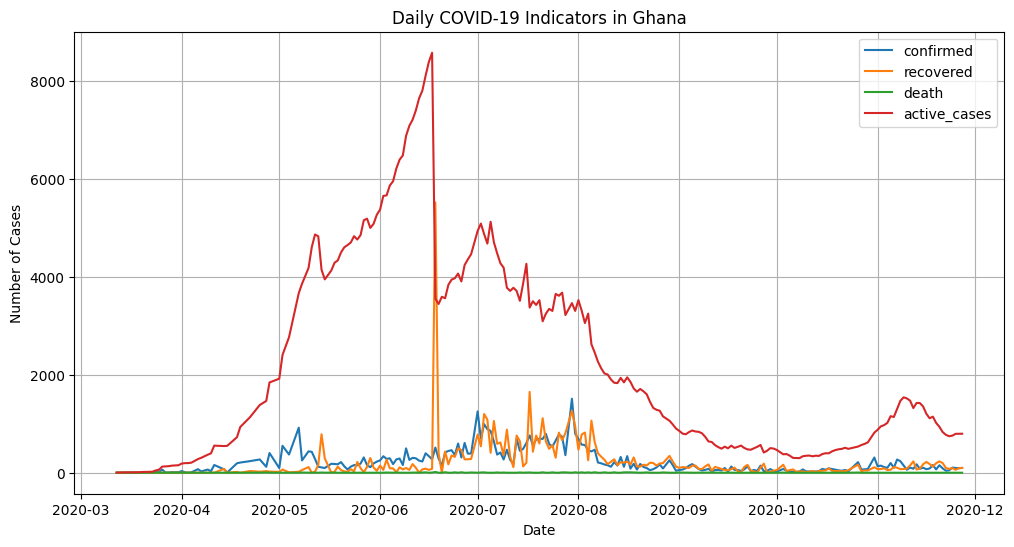

In [27]:
# Trends of COVID-19 indicators over time
num_cols = ['confirmed','recovered','death','active_cases']
for col in num_cols:
    # Calculate skewness and kurtosis for each column in the dataframe
    skewness = round(covid_data[col].skew(), 2)
    kurtosis = round(covid_data[col].kurtosis(), 2)
    print(f"{col} - Skewness: {skewness}, Kurtosis: {kurtosis}")

plt.figure(figsize=(12,6))
for c in num_cols:
    plt.plot(covid_data['date'], covid_data[c], label=c)
plt.title('Daily COVID-19 Indicators in Ghana')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.grid(True)
plt.show()


Comments:
- Rising phase: March–June 2020 — exponential spread 
- Peak phase: June–July — maximum active cases and recoveries surge.
- Decline phase: August–October — more recoveries, drop in active cases.
- Possible resurgence: November — mild increase after restrictions eased.

| Variable         | Skewness | Kurtosis | Interpretation                                                              |
| :--------------- | :------: | :------: | :-------------------------------------------------------------------------- |
| **Confirmed**    |   1.94   |   4.78   | Positively skewed; occasional high spikes in cases                          |
| **Recovered**    |   8.04   |   90.52  | Extremely skewed; dominated by a single large spike (batch recovery report) |
| **Death**        |   2.20   |   4.83   | Positively skewed; few days with higher-than-normal deaths                  |
| **Active Cases** |   0.93   |   0.00   | Mildly skewed; roughly symmetric around the main epidemic wave              |

Interpretation:

The distributions are non-normal, with positive skewness indicating long right tails (occasional surges).
The very high kurtosis in recovered confirms that recovery reporting was irregular.

The graph illustrates Ghana’s first major COVID-19 wave in 2020.
Active cases rose sharply between April and July, peaking around 8,000, before declining steadily as recoveries overtook new infections.
Daily deaths remained very low, and a one-day recovery spike suggests a bulk data update.
The overall pattern reflects successful containment after mid-2020, with only minor resurgence toward the year’s end.

cumulative_confirmed - Skewness: -0.31, Kurtosis: -1.61
cumulative_recovered - Skewness: -0.22, Kurtosis: -1.73
cumulative_death - Skewness: -0.14, Kurtosis: -1.65


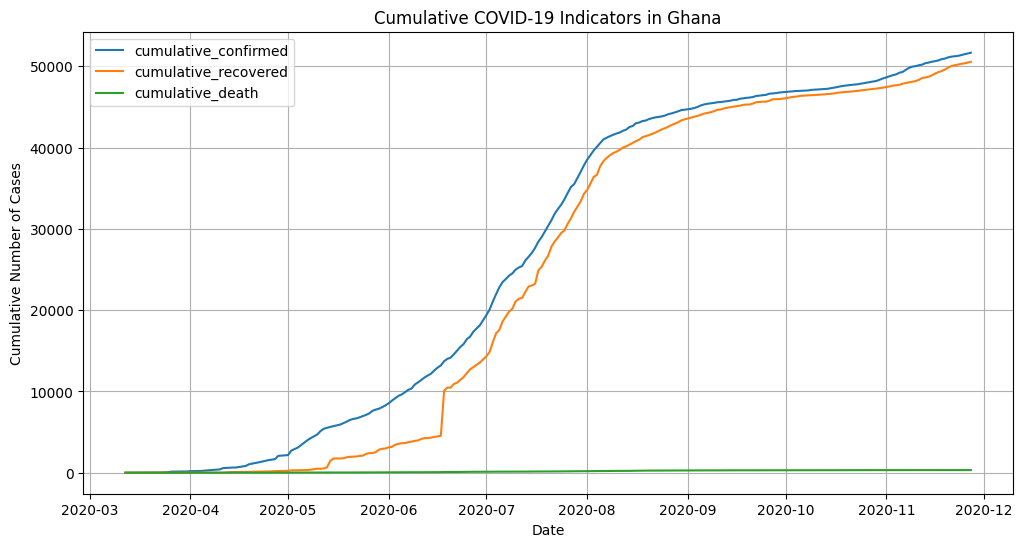

In [28]:
# Trends of Cumulative COVID-19 indicators over time
cum_cols = ['cumulative_confirmed','cumulative_recovered','cumulative_death']

for col in cum_cols:
    # Calculate skewness and kurtosis for each column in the dataframe
    skewness = round(covid_data[col].skew(), 2)
    kurtosis = round(covid_data[col].kurtosis(), 2)
    print(f"{col} - Skewness: {skewness}, Kurtosis: {kurtosis}")

plt.figure(figsize=(12,6))
for c in cum_cols:
    plt.plot(covid_data['date'], covid_data[c], label=c)
plt.title('Cumulative COVID-19 Indicators in Ghana')
plt.xlabel('Date')
plt.ylabel('Cumulative Number of Cases')
plt.legend()
plt.grid(True)
plt.show()



| Variable                 | Skewness | Kurtosis | Interpretation                                     |
| ------------------------ | -------- | -------- | -------------------------------------------------- |
| **Cumulative Confirmed** | –0.31    | –1.61    | Slightly left-skewed, flattening toward saturation |
| **Cumulative Recovered** | –0.22    | –1.73    | Similar left skew — plateauing trend               |
| **Cumulative Death**     | –0.14    | –1.65    | Nearly symmetric and flat — steady low growth      |

Negative skewness and low kurtosis indicate growth saturation — curves flattening out as the outbreak slows, not exponential anymore.

Comment:

The cumulative analysis of Ghana’s COVID-19 data shows a clear epidemic trajectory of rapid early growth followed by stabilization. Cumulative confirmed cases rose steeply from March to July 2020 and then flattened, indicating effective containment after the first wave. Cumulative recoveries closely tracked confirmed cases, with a brief reporting surge in June, and by late 2020 nearly all recorded infections had recovered. Cumulative deaths increased only marginally throughout, reflecting a very low fatality rate. The slight negative skewness and kurtosis across all cumulative indicators confirm that growth had slowed and the outbreak had reached a stable, flattened phase.



#### 2.2.2 Bivariate Analysis
Purpose: To explore relationships between pairs of key COVID-19 indicators in Ghana.

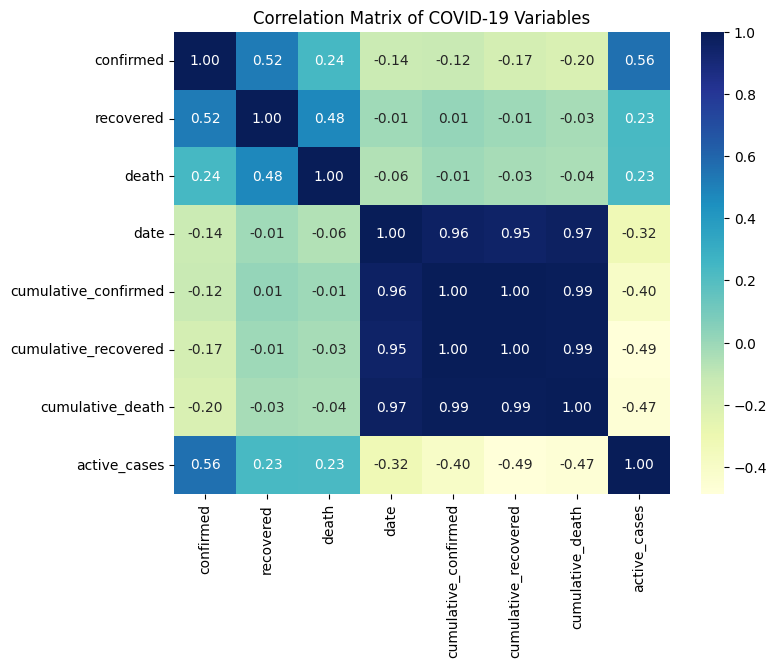

In [29]:
plt.figure(figsize=(8,6))
sns.heatmap(covid_data.corr(), annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Correlation Matrix of COVID-19 Variables')
plt.savefig('../Images/Covid19_Correlation_Matrix.png')


Comments:
- cumulative_confirmed, cumulative_recovered, and cumulative_death show very strong positive correlations (≈ 0.95 – 0.99).
- This means as total confirmed cases increased, total recoveries and deaths also rose proportionally — a consistent epidemic progression pattern.

Interpretation:

Cumulative indicators move together over time because they all track the same underlying infection growth and reporting timeline.

- confirmed and active_cases correlate at r = 0.56, indicating that daily new infections directly influence the number of people currently ill.
- This moderate correlation reflects that spikes in new cases quickly translate into higher active loads before recoveries offset them.

Insight:

Newly confirmed infections are a key short-term driver of active-case numbers.

- recovered (r = 0.52) and death (r = 0.24) both correlate positively with confirmed.

- Recoveries increase following rises in confirmed cases (expected lag effect), while daily deaths rise slightly during peaks.

Interpretation:

Infection surges are followed by proportional recoveries and small increases in fatalities.


- active_cases has weak-to-moderate negative correlations (−0.32 to −0.49) with cumulative totals.

- This occurs because as cumulative recoveries and deaths rise over time, the number of active cases tends to decline — signaling that more patients are leaving the “active” category.

Insight:

Growing cumulative recoveries gradually reduce the active-case burden, demonstrating effective case resolution.



- The date variable is strongly correlated (0.95 – 0.97) with cumulative measures, which simply reflects the natural accumulation of totals over time.

- Other pairings (e.g., daily vs. cumulative cross-metrics) show weak correlations, meaning short-term daily fluctuations do not distort overall long-term trends.

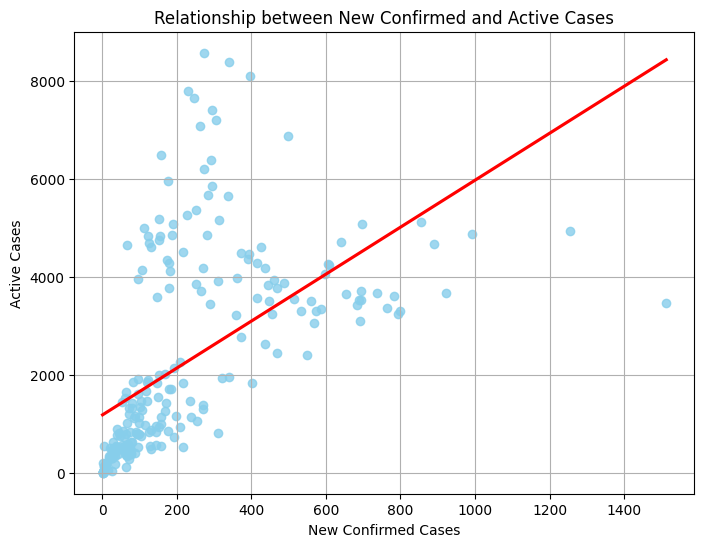

In [30]:
plt.figure(figsize=(8,6))
sns.regplot(x='confirmed', y='active_cases', data=covid_data,
            scatter_kws={'color':'skyblue'},   # color of points
            line_kws={'color':'red'},          # color of best-fit line
            ci=None)                           # remove confidence interval
plt.title('Relationship between New Confirmed and Active Cases')
plt.xlabel('New Confirmed Cases')
plt.ylabel('Active Cases')
plt.grid(True)
plt.show()

Comments:

The scatterplot with regression line reveals a clear positive linear relationship between new confirmed and active COVID-19 cases in Ghana. As daily infections increased, active cases rose proportionally, indicating that spikes in transmission immediately expanded the active-case burden. Although the data show some variability due to reporting and recovery lags, the overall trend confirms that the rate of new infections was the primary driver of Ghana’s active-case levels during 2020

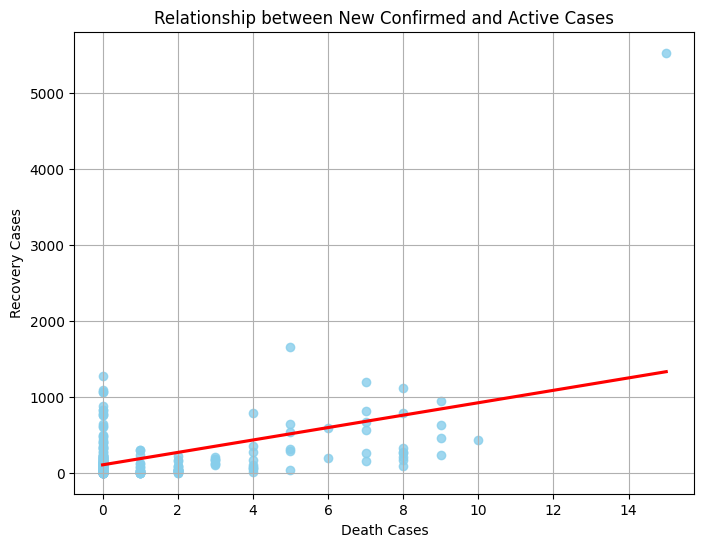

In [31]:
plt.figure(figsize=(8,6))
sns.regplot(x='death', y='recovered', data=covid_data,
            scatter_kws={'color':'skyblue'},   # color of points
            line_kws={'color':'red'},          # color of best-fit line
            ci=None)                           # remove confidence interval
plt.title('Relationship between New Confirmed and Active Cases')
plt.xlabel('Death Cases')
plt.ylabel('Recovery Cases')
plt.grid(True)
plt.show()

Comments:
The scatterplot reveals a weak positive relationship between daily death and recovery counts in Ghana’s COVID-19 data. Days with higher fatalities generally coincided with periods of increased recoveries, reflecting overall surges in case volume rather than a direct causal link. Most observations cluster at low death levels, confirming Ghana’s consistently low mortality rate, while the wide variation in recoveries indicates irregular reporting patterns and batch updates during the pandemic year.

### 2.2.3 Multivariate Analysis
Purpose: To analyze multiple COVID-19 indicators simultaneously to understand their combined trends and interactions over time in Ghana.

In [32]:
covid_data['check_active'] = covid_data['cumulative_confirmed'] - covid_data['cumulative_recovered'] - covid_data['cumulative_death']
print("Identity holds:", (covid_data['active_cases'] == covid_data['check_active']).all())


Identity holds: True
